In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('cs-test.csv').drop(['Unnamed: 0'], axis=1)
train = pd.read_csv('cs-training.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
test.shape

(101503, 11)

In [4]:
train.shape

(150000, 11)

In [5]:
train.duplicated().value_counts()

False    149391
True        609
Name: count, dtype: int64

In [6]:
train_redup = train.drop_duplicates()

In [7]:
train_redup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [8]:
round(train_redup.isnull().sum()/train_redup.shape[0]*100,2)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [9]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [10]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [11]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [12]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [13]:
train_redup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [14]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [15]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9744\693308875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9744\693308875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [16]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [17]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [18]:
fam_nmiss['MonthlyIncome'].agg(['mean', 'median', 'min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [19]:
fam_nmiss['MonthlyIncome'].agg(['max'])

max    3008750.0
Name: MonthlyIncome, dtype: float64

In [20]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\ACER\AppData\Local\Temp\ipykernel_9744\100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [21]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [22]:
filled_train = pd.concat([fam_nmiss, fam_miss])

In [23]:
filled_train.shape

(149391, 11)

In [24]:
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [25]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]*100

SeriousDlqin2yrs
0    93.300132
1     6.699868
dtype: float64

In [27]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [28]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [29]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [30]:
util_dropped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)

In [31]:
util_dropped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: >

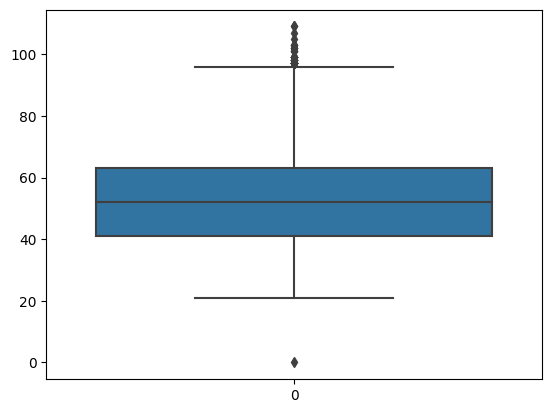

In [32]:
sns.boxplot(util_dropped['age'])

In [33]:
util_dropped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [34]:
util_dropped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [35]:
util_dropped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [36]:
util_dropped[util_dropped['NumberOfTimes90DaysLate'] >=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [37]:
util_dropped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

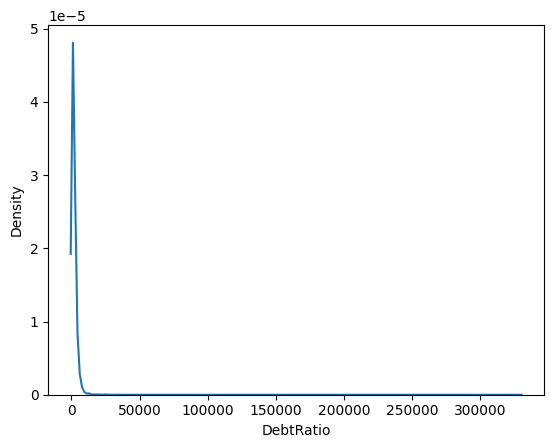

In [38]:
sns.kdeplot(util_dropped['DebtRatio'])

In [39]:
util_dropped['DebtRatio'].quantile([0.975])

0.975    3492.0
Name: DebtRatio, dtype: float64

In [40]:
util_dropped[util_dropped['DebtRatio']>3492][['SeriousDlqin2yrs', 'MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [41]:
temp = util_dropped[util_dropped['DebtRatio']>3492 & (util_dropped['SeriousDlqin2yrs'] == util_dropped['MonthlyIncome'])].describe()

In [42]:
dRatio = util_dropped.drop(util_dropped[(util_dropped['DebtRatio']>3492) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])].index)

In [43]:
dRatio.shape

(148768, 11)

In [44]:
pip install Xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
model = XGBClassifier(tree_method = 'exact')

In [51]:
x = dRatio.drop(['SeriousDlqin2yrs'], axis=1)
y = dRatio['SeriousDlqin2yrs']

In [54]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [55]:
accuracy_score(y,y_pred)

0.947139169713917

In [57]:
cm = confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'actuals')

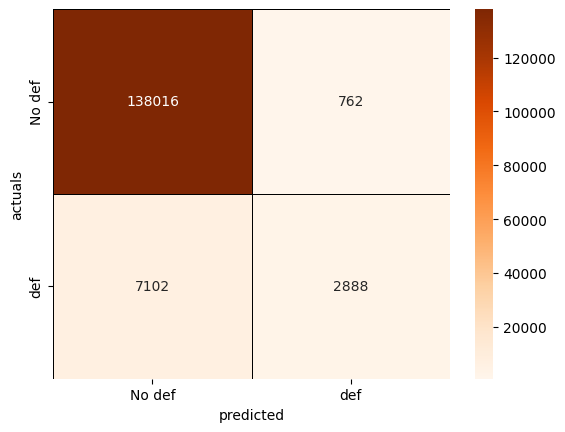

In [58]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")